In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [2]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [3]:
#Print im_org shape
print(f"im_org shape: {im_org.shape}")

#Print im_org type
print(f"im_org type: {im_org.dtype}")




im_org shape: (512, 512)
im_org type: uint8


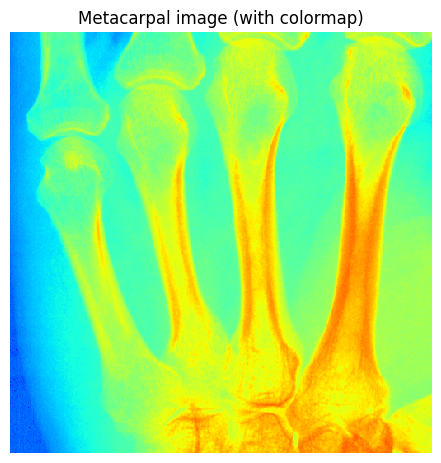

In [4]:
#Show image
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
plt.axis('off')
io.show()

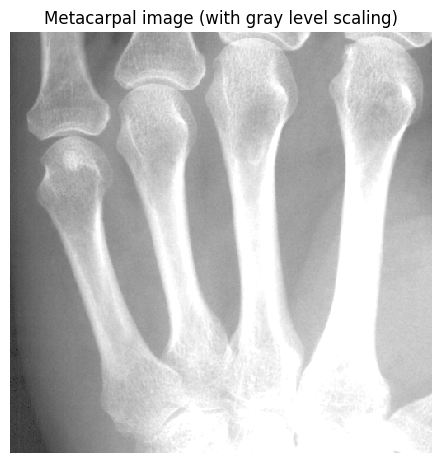

In [5]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
plt.axis('off')
io.show()

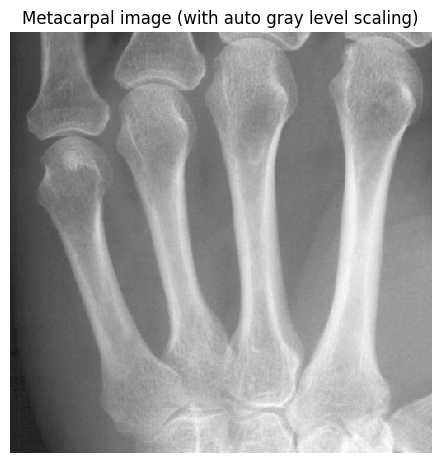

In [6]:
#Auto grey scale
black_threshhold = np.min(im_org)
white_threshhold = np.max(im_org)

io.imshow(im_org, vmin=black_threshhold, vmax=white_threshhold)
plt.title('Metacarpal image (with auto gray level scaling)')
plt.axis('off')
io.show()

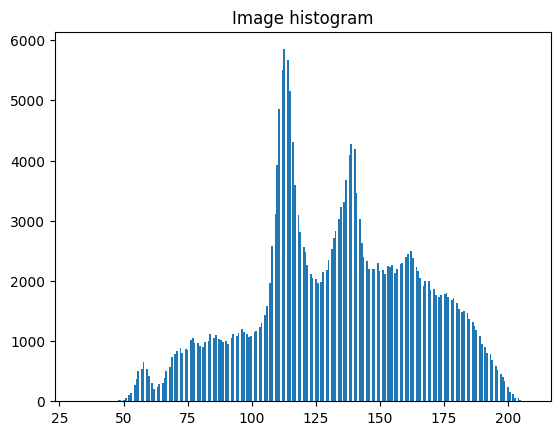

In [7]:
h = plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

In [8]:
bin_no = 100
count = h[0][bin_no]
print(f"There are {count:.0f} pixel values in bin {bin_no:.0f}")

There are 1147 pixel values in bin 100


In [9]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


Max frequency: 5848.0
Max frequency bin: 117
Bin left: 112.4375
Bin right: 113.125


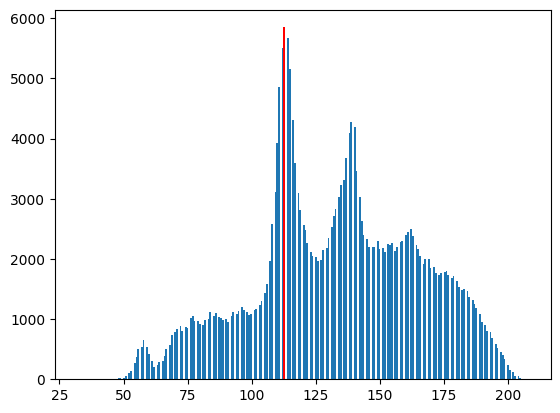

In [10]:
y, x, patches = plt.hist(im_org.ravel(), bins=256)
max_freq = np.max(y)
max_freq_bin = np.argmax(y)
bin_left = x[max_freq_bin]
bin_right = x[max_freq_bin+1]

patches[max_freq_bin].set_facecolor('r')
print(f"Max frequency: {max_freq}")
print(f"Max frequency bin: {max_freq_bin}")
print(f"Bin left: {bin_left}")
print(f"Bin right: {bin_right}")

In [11]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


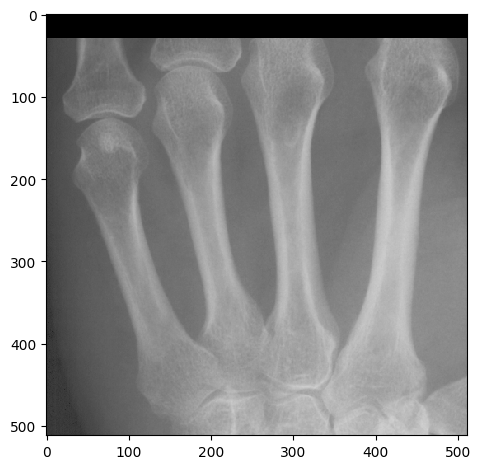

In [12]:
im_sliced = np.copy(im_org)
im_sliced[:30] = 0
io.imshow(im_sliced)
io.show()

We can use a masks or slices to filter values from our image. In the picture above we have set all img values between y = 0 and y = 30 to 0, which has blacked out the top part of the image. Below we have set all pixel values above 150 to True, which is translated to 1 and all pixel values below 150 to False, which is translated to 0. I a binary image this results in pixel values of 0 to become black and values of 1 to become white.

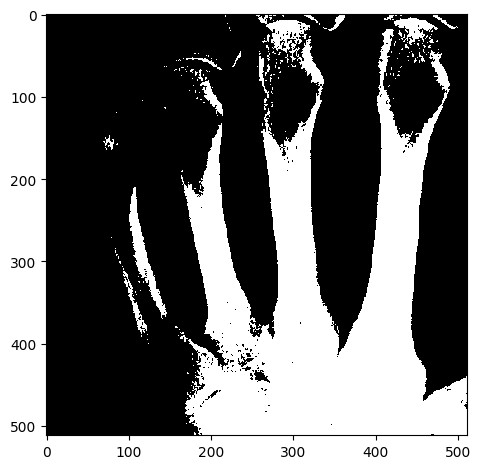

In [13]:
mask_treshhold = 150
mask = im_org > mask_treshhold
io.imshow(mask)
io.show()

The following code below, takes the previous mask and sets the pixel values to 255 where the values are True in the mask, and for the False values, the original image remains unchanged.

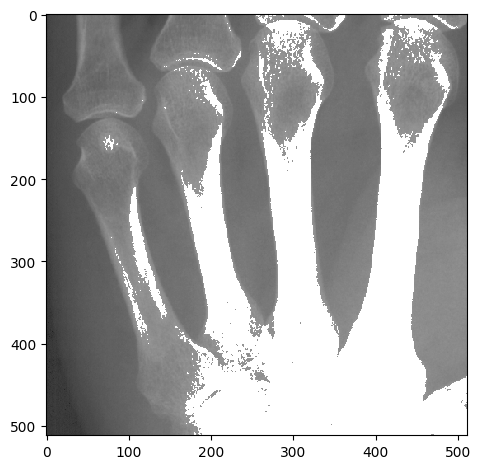

In [14]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

The pixel value at (r,c) = (110, 90) is: [120 120 120] as a list of (R,G,B) values.


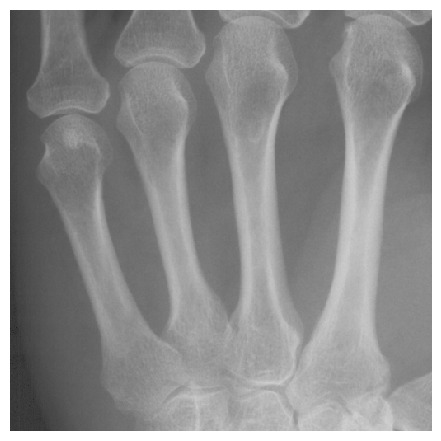

In [15]:
image_path = in_dir + im_name
im_rgb = io.imread(image_path, as_gray=False, pilmode="RGB")
r = 110
c = 90

im_val = im_rgb[r,c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val} as a list of (R,G,B) values.")

io.imshow(im_rgb)
plt.axis('off')
io.show()